In [1]:
from UWB_lib.UWBSignal import UWBSignal
from UWB_lib.UWB_referencepulse import UWB_Pulse
import numpy as np
import matplotlib.pyplot as plt


In [2]:
demo_UWB_signal = UWBSignal("-0000+0-0+++0+-000+-+++00-+0-00")
demo_UWB_pulse = UWB_Pulse(f_center = 3993.6, bandwidth = 499.2)
pulse_c, pulse_t = demo_UWB_pulse.get_sampled_impulse("time", "passband")

<lambdifygenerated-5>:2: RuntimeWarning: divide by zero encountered in log10
  return 20*log10(select([less(f, -0.375),less(f, -0.125),less_equal(f, 0.125),less_equal(f, 0.375),True], [0,1.0*cos(pi*(-4.0*f - 0.5)) + 1.0,2.0,1.0*cos(pi*(4.0*f - 0.5)) + 1.0,0], default=nan))


In [3]:
pulse_c, pulse_t = demo_UWB_pulse.get_sampled_impulse("time", "passband")
pulse = []

In [4]:
signal = demo_UWB_signal.output_signal()
filtered = [(polarity, time) for polarity, time in signal if polarity != 0]

In [5]:
convoluted = [(c*pol, t+time) for pol, time in filtered for c, t in zip(pulse_c, pulse_t)]

signal_real = [(val.real, time) for val, time in convoluted]


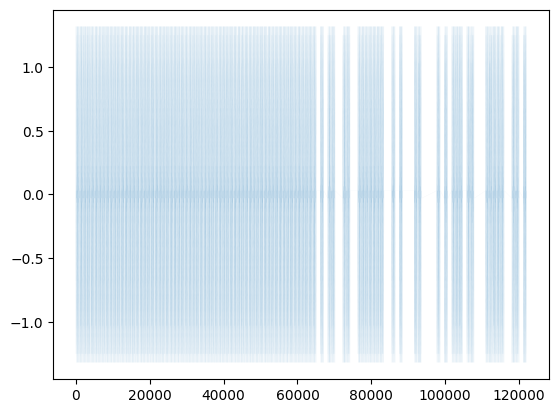

In [6]:
values  = [val for val, time in signal_real]
times   = [time for val, time in signal_real]
plt.plot( times, values, linewidth = 0.01)
plt.savefig("testplot3.pdf", dpi = 1000)


In [7]:
#adding noise
noise = np.random.normal(0,0.1,len(convoluted))
noisy_signal = np.add(values, noise)

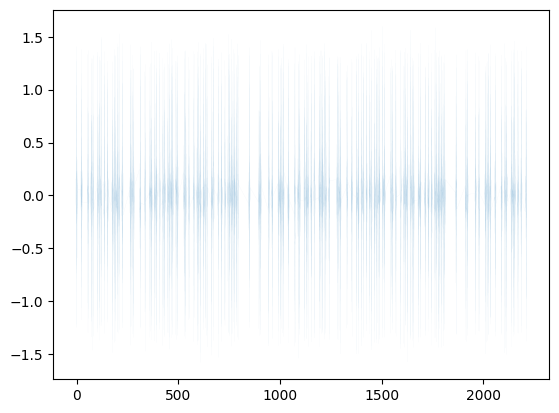

In [8]:
plt.plot( times[:10000], noisy_signal[:10000], linewidth = 0.01)

plt.savefig("testplot_noise.pdf", dpi = 1000)

In [9]:

remove_zeros = [(polarity, time) for polarity, time in demo_UWB_signal.shr_timings['PHR_time_chip_array'] if polarity != 0]

In [10]:
signal[-100]

(0, 123325.53803149605)

In [11]:
remove_zeros_sig = [(polarity, time) for polarity, time in demo_UWB_signal.shr_timings['UWB_signal'] if polarity != 0]


In [12]:
signal_real_np = np.array(signal_real)
np.savetxt("demosignal",signal_real_np, delimiter = " ")

In [13]:
single_pulse = demo_UWB_pulse.get_impulse()
pulse_s_50ps, pulse_t_50ps = single_pulse.sample(-4, 4, sampling_period=0.10)
pulse_t_50ps += 4
pulse_m20db = pulse_s_50ps.real/10 #pulse scaled from to -20 dB, in V
pulse = np.array([pulse_t_50ps, pulse_m20db]).T

In [14]:
np.savetxt("demo_pulse.txt",pulse, fmt="%1.8fn %1.8fm")

In [ ]:
formula = single_pulse.function/10000
from sympy import integrate
from sympy.abc import t
integration = integrate(formula**2, (t, -1, 1))



d:\Design\Software\UWB\UWB_simulator\.venv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Design\Software\UWB\UWB_simulator\.venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


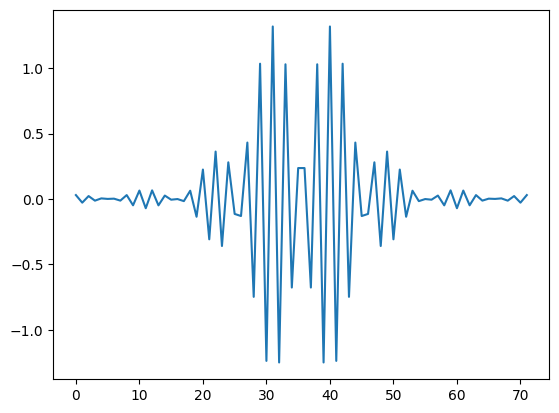

In [16]:
pulse_c, pulse_t = demo_UWB_pulse.get_sampled_impulse("time", "passband")
plt.plot(pulse_c)

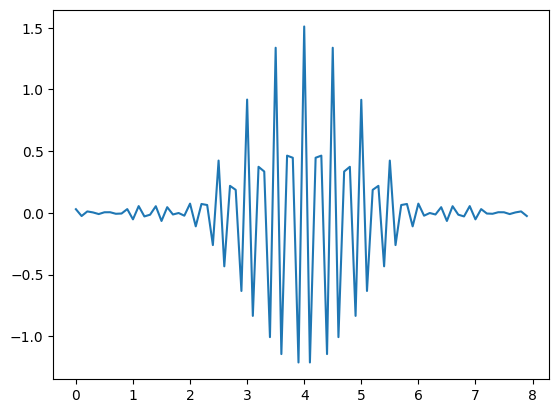

In [17]:
plt.plot(pulse_t_50ps, pulse_s_50ps)

d:\Design\Software\UWB\UWB_simulator\.venv\lib\site-packages\scipy\signal\_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


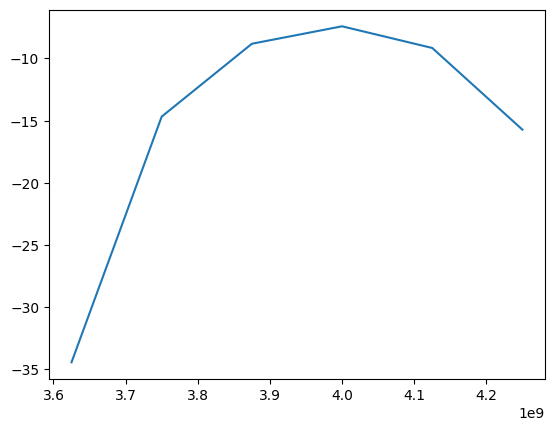

In [19]:
from scipy.signal import periodogram
single_pulse = demo_UWB_pulse.get_impulse()
pulse_s_50ps, pulse_t_50ps = single_pulse.sample(-4, 4, sampling_period=0.1)
f, p = periodogram(pulse_s_50ps, fs=1/(100e-12), scaling="spectrum")
plt.plot(f[29:35], 10*np.log10(p[29:35]))


In [21]:
# a = np.fft.fft(pulse_s_50ps)
# a = np.fft.fftshift(a)/40
# b = np.fft.fftfreq(160, 50e-12)
# b = np.fft.fftshift(b)
# plt.semilogy(b[109:115], abs(a[109:115])**2)

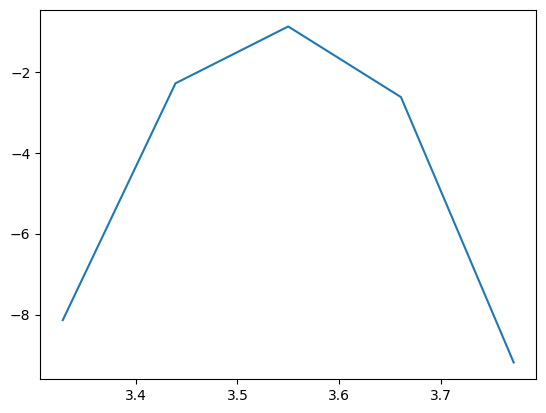

In [22]:
f, p =periodogram(pulse_s_50ps.real, fs=1/(pulse_t[1]-pulse_t[0]), scaling="density")
plt.plot(f[30:35], 10*np.log10(p[30:35]))

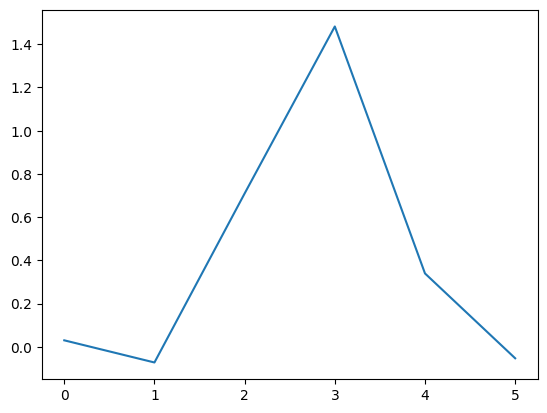

In [23]:
sig_baseband = demo_UWB_pulse.get_impulse("time", "baseband")
#sig_baseband.plot()
base = sig_baseband.sample(-4, 4, sampling_period=1.4)[0]
basetrans = np.fft.fft(np.fft.fftshift(base), norm="ortho")
# plt.plot(np.fft.fftshift(np.fft.ifft(basetrans)))
plt.plot(base)

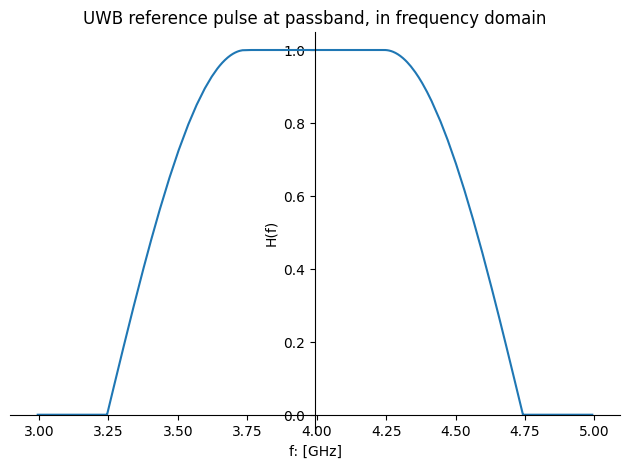

In [24]:
freq_passband = demo_UWB_pulse.get_impulse("frequency", "passband")
freq_passband.plot()

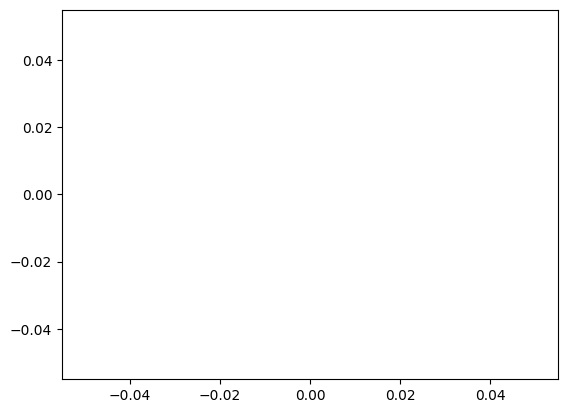

In [25]:
s= freq_passband.sample()
s = s[0]
s = np.array([0]*90+list(s))
plt.plot()
a = np.fft.irfft(np.fft.fftshift(s))

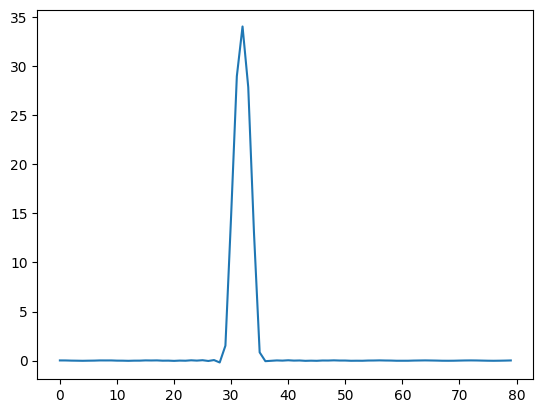

In [26]:
a = np.fft.fft(np.fft.fftshift(pulse_s_50ps))

b = np.fft.ifftshift(np.fft.ifft(a))
plt.plot(a)

d:\Design\Software\UWB\UWB_simulator\.venv\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 80, using nperseg = 80
  warnings.warn('nperseg = {0:d} is greater than input length '


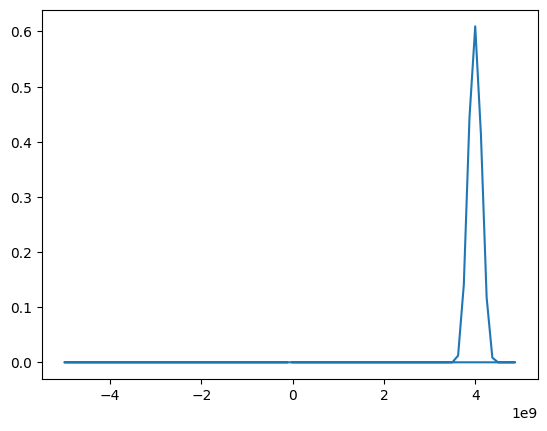

In [27]:
from scipy import signal
t, s = signal.welch(pulse_s_50ps,10e09, scaling="spectrum")
plt.plot(t, s)

